In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

data_dir = '../data'
filename = 'AB_NYC_2019.csv'
data_path = os.path.join(data_dir, filename)

df = pd.read_csv(data_path)
df.shape

(48895, 16)

In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df['last_review'] = pd.to_datetime(df['last_review'])

unfilled_cols = df.columns[df.isnull().any()]
unfilled_cols

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null datetime64[ns]
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-nu

In [5]:
# Descriptive stats excluding non-numeric columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,48879,48874,48895,48895,48895
unique,47905,11452,5,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,18,417,21661,3920,25409


In [7]:
# About of 10k (almost quarter of full dataset!!!)
# observations don't have useful reviews info 
no_info_cond = df['number_of_reviews'] == 0 & \
               df['last_review'].isnull() & \
               df['reviews_per_month'].isnull()
no_info_sample = df[no_info_cond]

df.drop(index=no_info_sample.index, inplace=True)

df.index = range(len(df))

In [8]:
neighbourhood_vc = df['neighbourhood'].value_counts(normalize=True)
print(f'Count of neighbourhoods {len(neighbourhood_vc)}')
neighbourhood_vc.head()

Count of neighbourhoods 218


Williamsburg          0.081430
Bedford-Stuyvesant    0.080864
Harlem                0.056793
Bushwick              0.050048
Hell's Kitchen        0.039441
Name: neighbourhood, dtype: float64

In [9]:
by_nhgroup = df.groupby(by='neighbourhood_group')

price_rev_stats = by_nhgroup[
    ['price', 'reviews_per_month']
].agg([np.mean, np.std])

price_rev_stats

price             reviews_per_month          
                           mean         std              mean       std
neighbourhood_group                                                    
Bronx                 79.553653   63.962726          1.837831  1.673284
Brooklyn             121.448714  169.851030          1.283212  1.516259
Manhattan            180.052489  226.405766          1.272131  1.628252
Queens                95.762571  168.361417          1.941200  2.213108
Staten Island         89.964968   65.864044          1.872580  1.685495

In [10]:
by_nhgroup[['number_of_reviews', 'reviews_per_month']].median()

,number_of_reviews,reviews_per_month
neighbourhood_group,,
Bronx,15,1.38
Brooklyn,9,0.66
Manhattan,8,0.61
Queens,13,1.21
Staten Island,20,1.41


In [11]:
by_room = df.groupby(by='room_type')

def get_stats(group):
    return pd.DataFrame({
        'count': group.count(),
        'mean': group.mean(),
        'std': group.std()
    })

by_room_stats = by_room[
    ['number_of_reviews', 'minimum_nights']
].apply(get_stats)

by_room_stats.unstack()

count                             mean  \
                number_of_reviews minimum_nights number_of_reviews   
room_type                                                            
Entire home/apt             20332          20332         28.546282   
Private room                17665          17665         30.475290   
Shared room                   846            846         22.761229   

                                             std                 
                minimum_nights number_of_reviews minimum_nights  
room_type                                                        
Entire home/apt       7.083809         45.659567      19.941076  
Private room          4.539145         51.304527      14.109122  
Shared room           4.398345         38.242202       9.439484

In [12]:
def avg_per_sample(group):
    return group.sum() / group.count()

transf = by_room[
    ['number_of_reviews', 'minimum_nights', 'price']
].transform(avg_per_sample)

transf.head()

,number_of_reviews,minimum_nights,price
0,30.475290,4.539145,83.981093
1,28.546282,7.083809,196.294068
2,28.546282,7.083809,196.294068
3,28.546282,7.083809,196.294068
4,28.546282,7.083809,196.294068


In [13]:
num_df = df.select_dtypes(include=np.number)
num_df.apply(np.mean)

id                                1.809646e+07
host_id                           6.423915e+07
latitude                          4.072813e+01
longitude                        -7.395115e+01
price                             1.423179e+02
minimum_nights                    5.868059e+00
number_of_reviews                 2.929756e+01
reviews_per_month                 1.373221e+00
calculated_host_listings_count    5.164457e+00
availability_365                  1.148829e+02
dtype: float64

In [14]:
def plot_hbar(frame: pd.DataFrame, column: str):
    data = frame[column]
    vc = data.value_counts()
    cat_values = vc.index
    y_pos = np.arange(len(cat_values))

    plt.figure(figsize=(8, 4))
    plt.yticks(y_pos, cat_values)
    plt.barh(cat_values, vc, height=0.7)
    plt.title(f'{column} distribution')
    plt.grid()

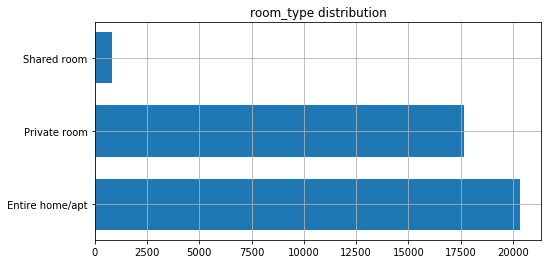

In [15]:
plot_hbar(df, column='room_type')

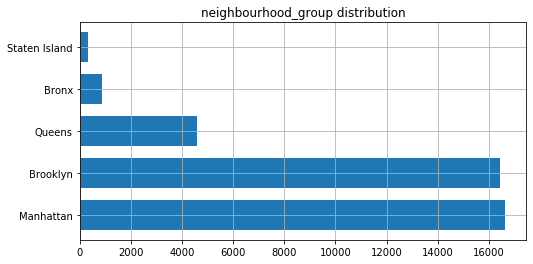

In [16]:
plot_hbar(df, column='neighbourhood_group')

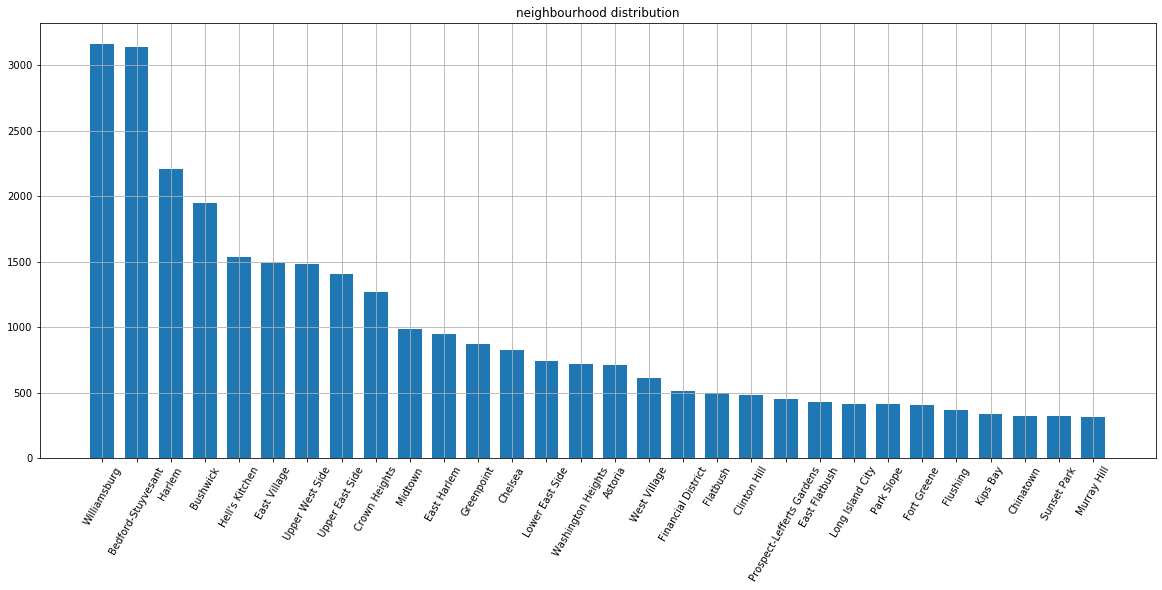

In [17]:
nh_vc = df['neighbourhood'].value_counts()
top_nh = nh_vc[:30]
values = top_nh.index
pos = np.arange(len(values))

plt.figure(figsize=(20, 8))
plt.xticks(pos, values, rotation=60)
plt.bar(values, top_nh, width=0.7)
plt.title('neighbourhood distribution')
plt.grid()

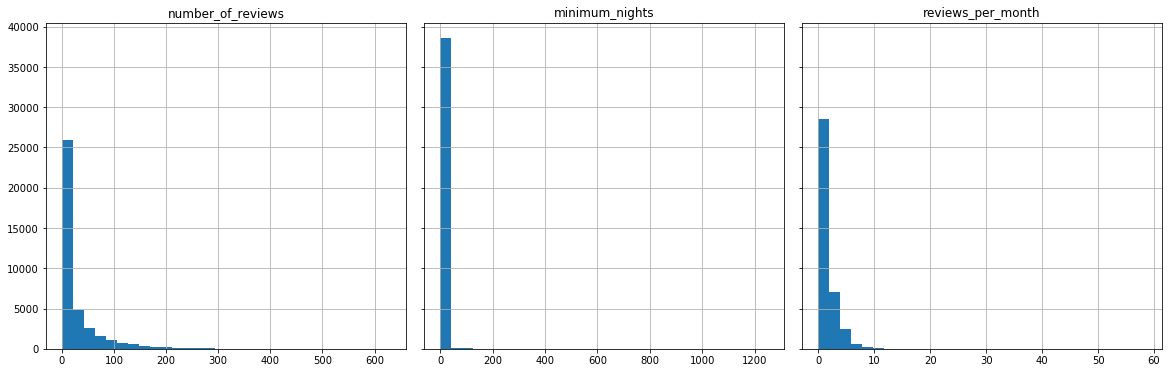

In [18]:
cols_to_hist = ['number_of_reviews', 'minimum_nights',
                'reviews_per_month']

fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for (col, axis) in zip(cols_to_hist, ax):
    axis.hist(df[col], bins=30)
    axis.set_title(col)
    axis.grid()
    
plt.subplots_adjust(wspace=0.05)

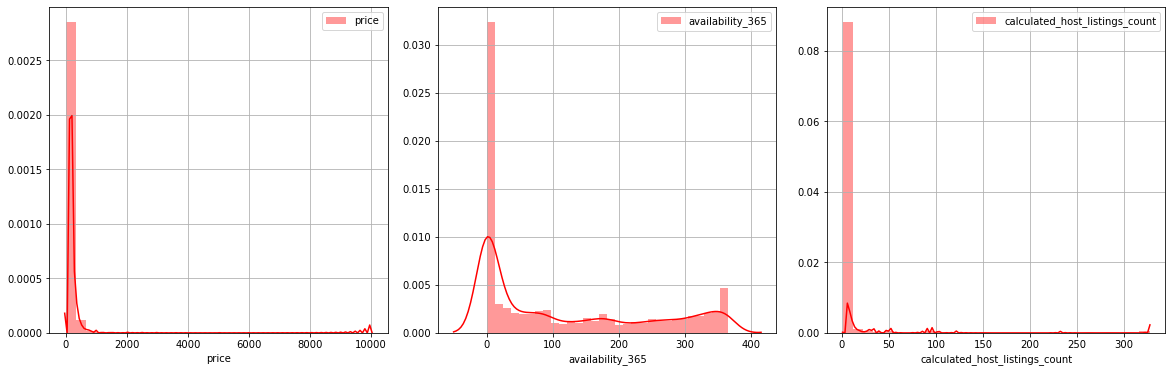

In [19]:
cols_to_dist = ['price', 'availability_365',
                'calculated_host_listings_count']

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for col, axis in zip(cols_to_dist, ax):
    sns.distplot(df[col], bins=30, color='red',
                 label=col, ax=axis)
    axis.legend()
    axis.grid()

plt.subplots_adjust(wspace=0.15)

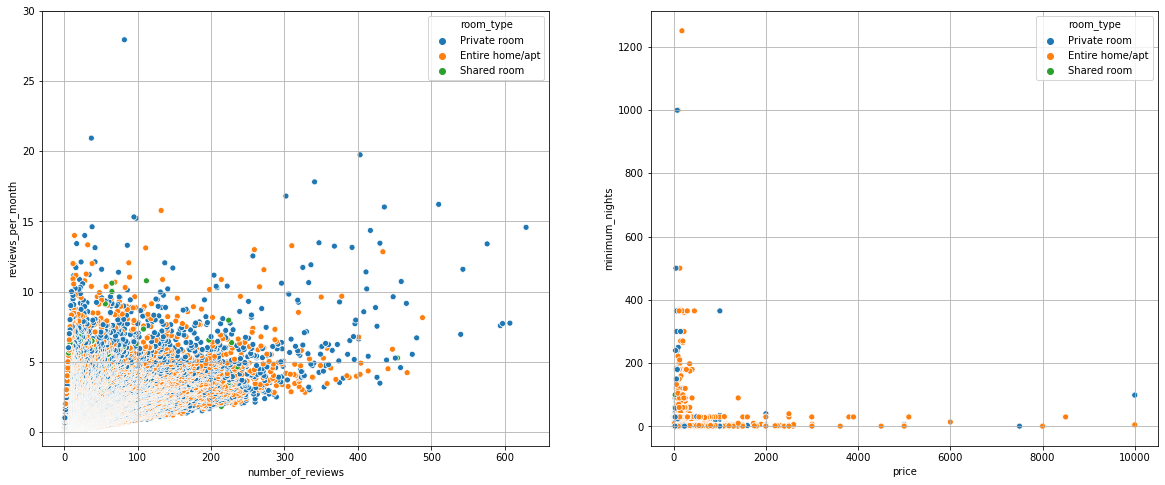

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(df['number_of_reviews'], df['reviews_per_month'],
                ax=ax[0], hue=df['room_type'])
sns.scatterplot(df['price'], df['minimum_nights'],
                ax=ax[1], hue=df['room_type'])

ax[0].grid()
ax[1].grid()
ax[0].set_ylim([-1, 30])
plt.subplots_adjust(wspace=0.2)

In [21]:
# Brief FE
df[['avg_num_reviews', 'avg_min_nights', 'avg_price']] = transf

price_mean = df['price'].mean()
df['diff_mean_price'] = df['price'].transform(
    lambda x: abs(x - price_mean))

def diff_mean(group):
    return abs(group - group.mean())

diff_med_reviews = by_nhgroup['number_of_reviews'].apply(diff_mean)
df['diff_med_reviews'] = diff_med_reviews 
df['min_payment'] = df['price'] * df['minimum_nights']

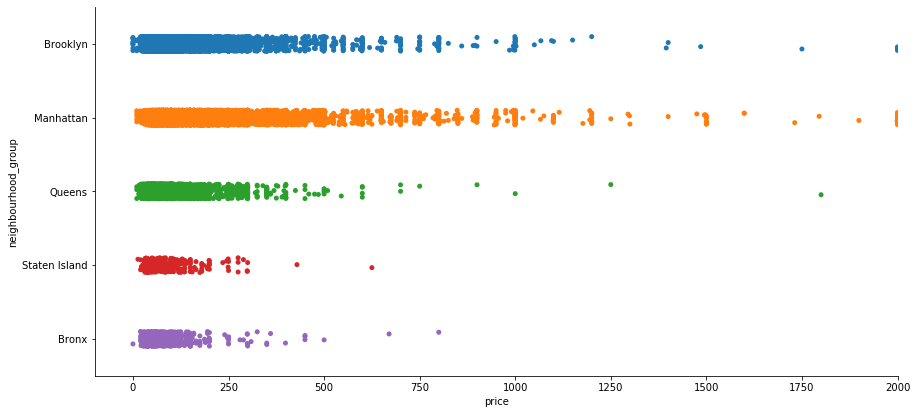

In [22]:
fg = sns.catplot(x='price', y='neighbourhood_group',
                 data=df, orient='h', legend_out=True)
fg.ax.set_xlim([-100, 2000])
fg.fig.set_figwidth(16)
fg.fig.set_figheight(6)

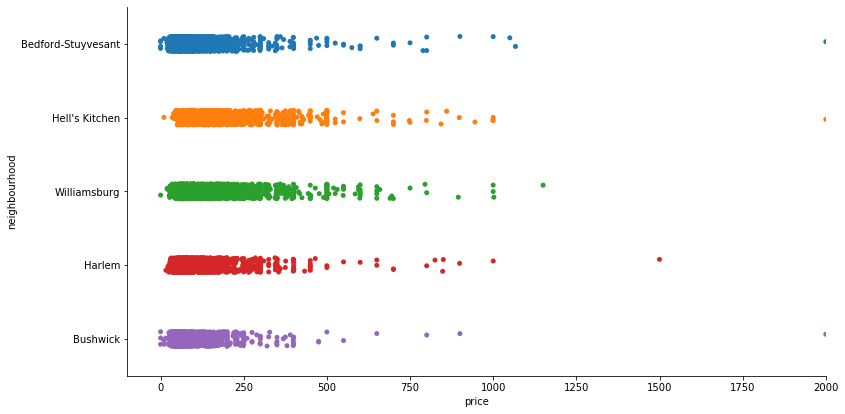

In [23]:
top_nh = nh_vc[:5]
top_nh_df = df[df['neighbourhood'].isin(top_nh.index)]

fg = sns.catplot(x='price', y='neighbourhood',
                 data=top_nh_df, orient='h', legend_out=True)
fg.ax.set_xlim([-100, 2000])
fg.fig.set_figwidth(16)
fg.fig.set_figheight(6)

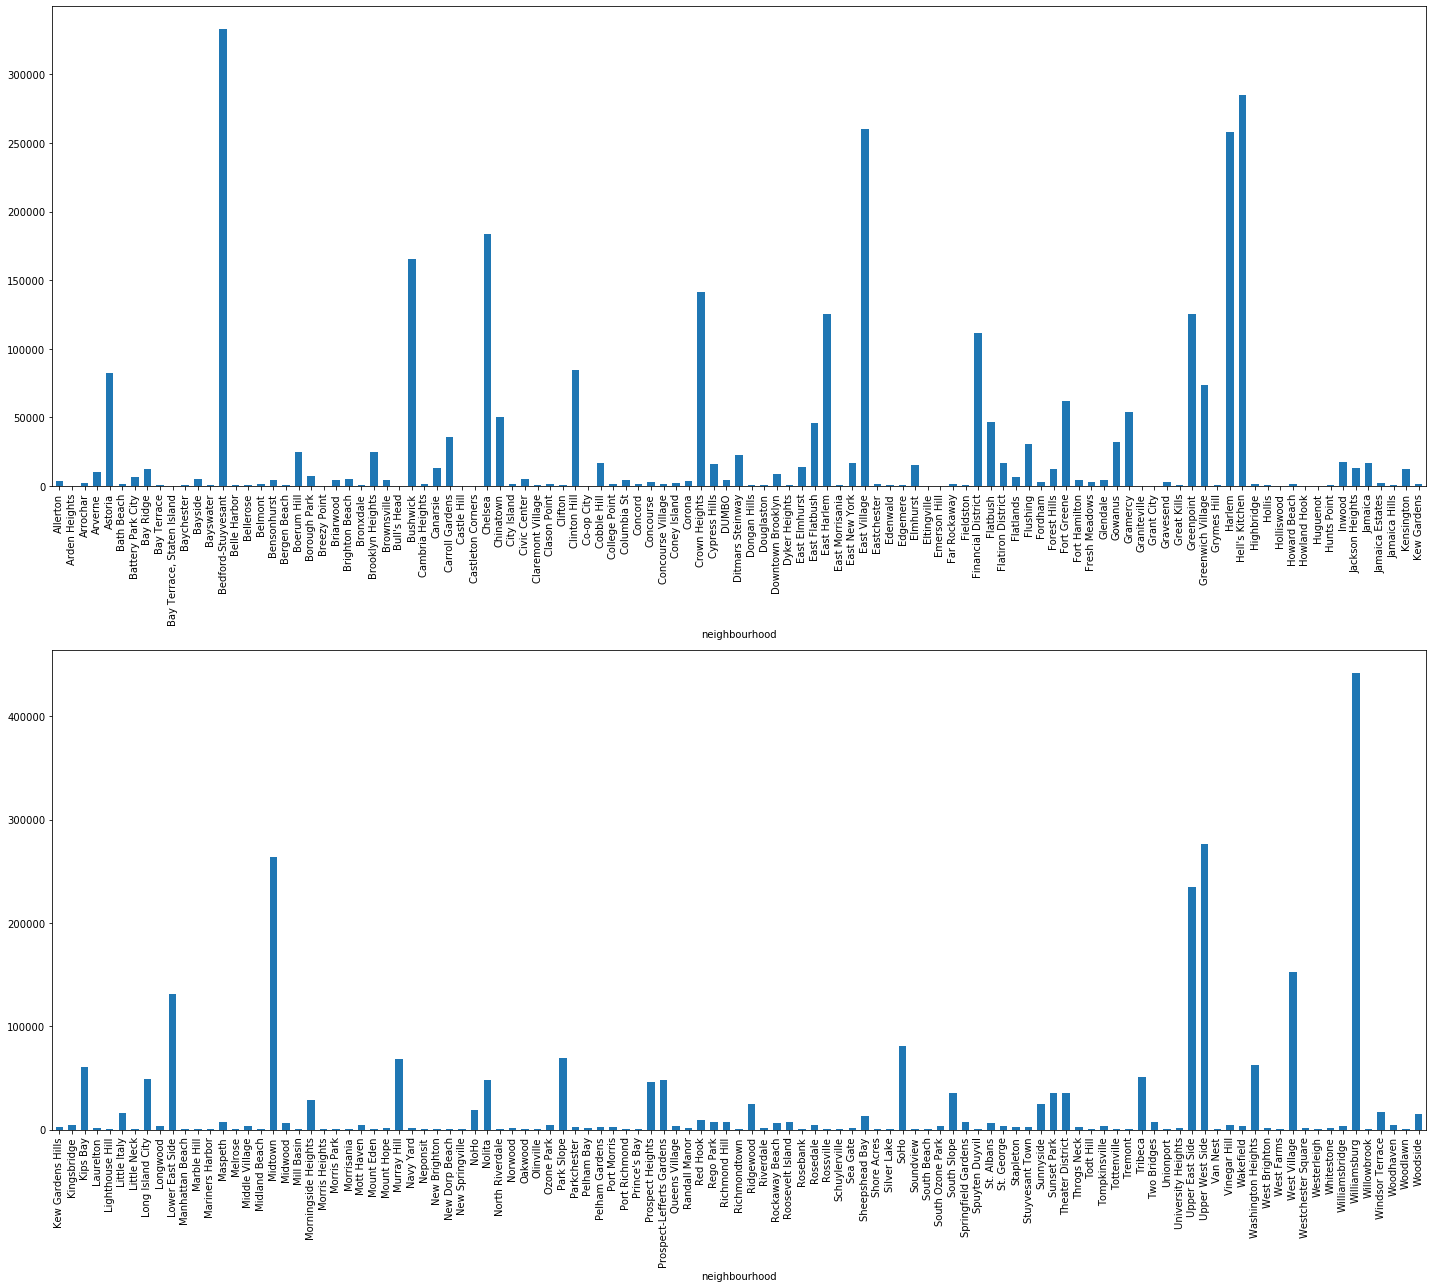

In [24]:
by_nh = df.groupby(by='neighbourhood')

length = len(by_nh) 
first_half_price = by_nh['price'].sum()[:length // 2]
second_half_price = by_nh['price'].sum()[length // 2:]

fig, ax = plt.subplots(2, 1, figsize=(20, 18))
first_half_price.plot(kind='bar', rot=90, ax=ax[0], width=0.6)
second_half_price.plot(kind='bar', rot=90, ax=ax[1], width=0.6)
plt.tight_layout()

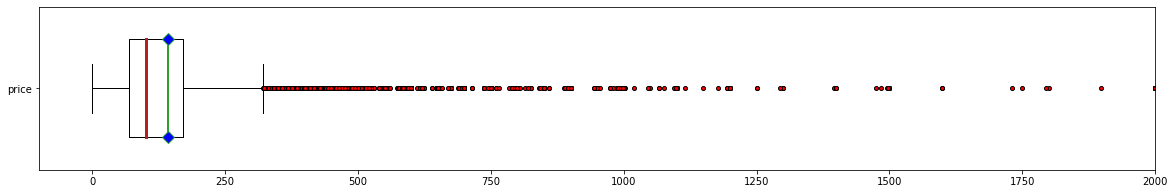

In [25]:
flier_props = {'marker': 'o', 'markerfacecolor': 'red', 'markersize': 4}
median_props = dict(linestyle='-', linewidth=3, color='firebrick')
mean_pointprops = dict(marker='D', markerfacecolor='blue',
                       linestyle='-', linewidth=2, markersize=8)

plt.figure(figsize=(20, 3))
ax = plt.gca()
ax.set_xlim([-100, 2000])

box = plt.boxplot(df['price'], labels=['price'], vert=False,
                  flierprops=flier_props, medianprops=median_props, 
                  meanprops=mean_pointprops, meanline=True,
                  showmeans=True, widths=0.6)

In [26]:
target = df['price']
df.drop(columns=['price'], inplace=True)

In [27]:
# What to do with zero price ?
print(f'There isn"t price in {len(target[target == 0.0])} observations')
target.replace(to_replace=0, value=target.mean(), inplace=True)

There isn"t price in 10 observations


Target skewness: 23.6824
kurtosis: 954.1399


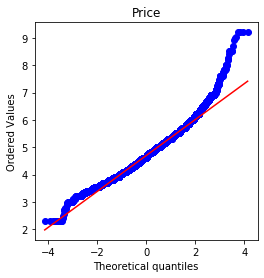

In [28]:
skew = target.skew()
kurt = target.kurtosis()
print(f'Target skewness: {skew:.4f}\nkurtosis: {kurt:.4f}')

# Log-transformation for target normalization
target = np.log(target)

plt.figure(figsize=(4, 4))
stats.probplot(target, plot=plt)
text = plt.title('Price')